# Using the duqmap function

The api provides a map function `duqmap` which can be used to map functions over data generated by duqtools, or just data that you specify yourself (as in this example)

In [1]:
import xarray as xr

from duqtools.api import ImasHandle, Run, Runs, duqmap, rebase_all_coords

## Read data from `runs.yaml`

This data is later used to instrument duqtools over which `runs` to apply the function

In [2]:
runs = Runs.parse_file("example/runs.yaml")
for run in runs:
    run.data_out.relative_location = None

## Define a function to be used with `duqmap`

Functions should have either `Run` or `ImasHandle` as the type of the first argument, `duqmap` will then take care of converting the input to the correct type

In [3]:
def print_and_return_handle(run: Run):
    print(run.dirname)
    return str(run.dirname)

this function extracts the dirnames from any runs `duqmap` operates over:

In [4]:
names = duqmap(print_and_return_handle, runs=runs)

run_0000
run_0001
run_0002


A function to extract the electron temperature of each `ImasHandle` for each output mapped over by `duqmap`:

In [5]:
def extract_te(handle: ImasHandle):
    return handle.get_variables(['t_e', 'rho_tor_norm', 'time'])

Retrieve a dataset for each of the `runs` specified:

In [6]:
datasets = duqmap(extract_te, runs=runs)
datasets

[<xarray.Dataset>
 Dimensions:       (time: 1, rho_tor_norm: 101)
 Coordinates:
   * time          (time) float64 45.75
   * rho_tor_norm  (rho_tor_norm) float64 0.0 0.01 0.02 0.03 ... 0.98 0.99 1.0
 Data variables:
     t_e           (time, rho_tor_norm) float64 4.883e+03 4.881e+03 ... 218.1,
 <xarray.Dataset>
 Dimensions:       (time: 1, rho_tor_norm: 101)
 Coordinates:
   * time          (time) float64 45.75
   * rho_tor_norm  (rho_tor_norm) float64 0.0 0.01 0.02 0.03 ... 0.98 0.99 1.0
 Data variables:
     t_e           (time, rho_tor_norm) float64 4.131e+03 4.13e+03 ... 184.5,
 <xarray.Dataset>
 Dimensions:       (time: 1, rho_tor_norm: 101)
 Coordinates:
   * time          (time) float64 45.75
   * rho_tor_norm  (rho_tor_norm) float64 0.0 0.01 0.02 0.03 ... 0.98 0.99 1.0
 Data variables:
     t_e           (time, rho_tor_norm) float64 4.507e+03 4.505e+03 ... 201.3]

Rebase and convert all the data into a single dataset with the help of `xarray`

In [7]:
datasets = rebase_all_coords(datasets, datasets[0])
dataset = xr.concat(datasets, dim='run')
dataset['run'] = names
dataset

<xarray.Dataset>
Dimensions:       (run: 3, time: 1, rho_tor_norm: 101)
Coordinates:
  * time          (time) float64 45.75
  * rho_tor_norm  (rho_tor_norm) float64 0.0 0.01 0.02 0.03 ... 0.98 0.99 1.0
  * run           (run) <U8 'run_0000' 'run_0001' 'run_0002'
Data variables:
    t_e           (run, time, rho_tor_norm) float64 4.883e+03 ... 201.3

## Plot our results the way we want

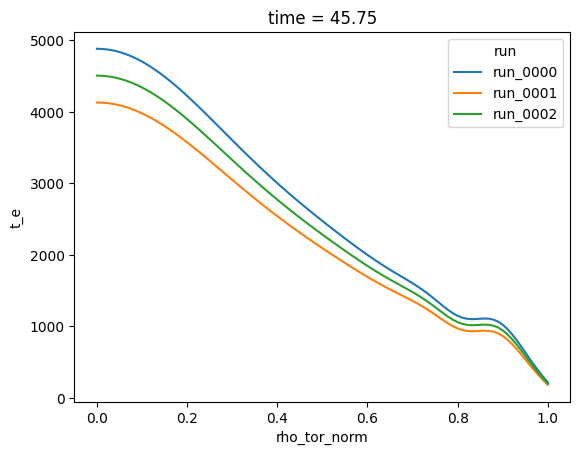

In [8]:
dataset['t_e'].isel(time=0).plot.line(x='rho_tor_norm', hue='run')